In [51]:
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import pandas as pd
import PIL
import tifffile

In [52]:
listy = ["D", "R", "F"]
img = [tifffile.imread("01_POS002_"+i+".TIF") for i in listy]

In [53]:
import glob

In [54]:
sorted(glob.glob("01_P*.TIF"))

['01_POS002_D.TIF', '01_POS002_F.TIF', '01_POS002_R.TIF']

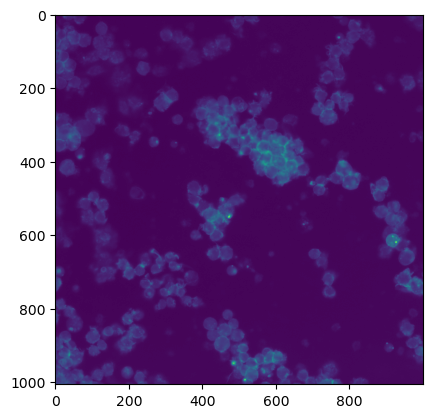

In [55]:
plt.imshow(img[2])

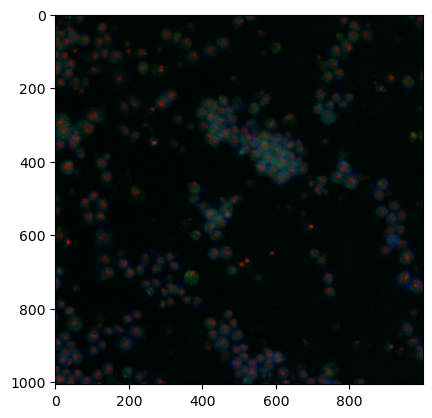

In [56]:
img2=np.moveaxis(np.array(img), 0, 2)
img2.shape
plt.imshow(np.array(img2))

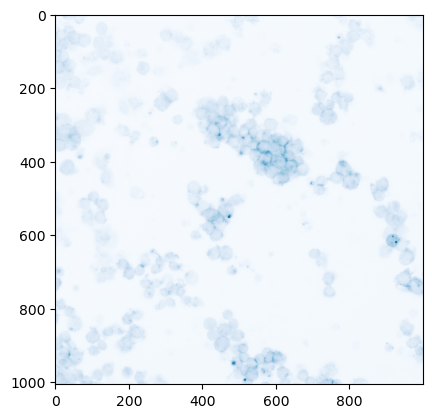

In [64]:
c1df = pd.DataFrame(img2[:, :, 2])
plt.imshow(c1df, cmap = "Blues")

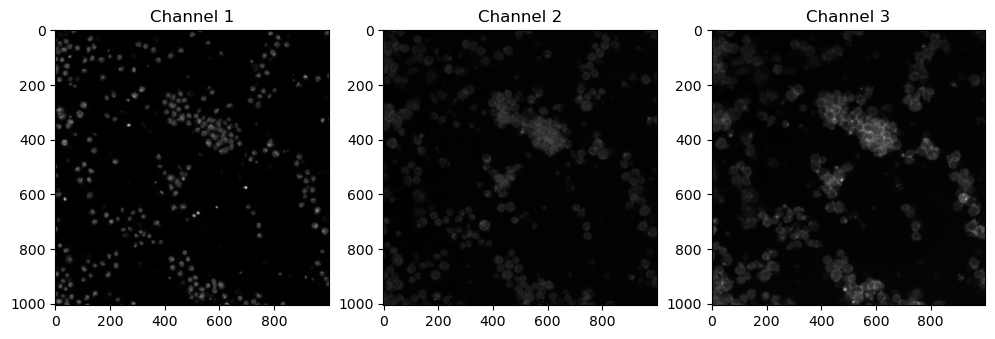

In [68]:
plt.figure(figsize = (12,4))
ax=plt.subplot(1, 3, 1)
ax.imshow(img2[:,:,0], cmap = "gray")
ax.set_title("Channel 1")
ax=plt.subplot(1, 3, 2)
ax.imshow(img2[:,:,1], cmap = "gray")
ax.set_title("Channel 2")
ax=plt.subplot(1, 3, 3)
ax.imshow(img2[:,:,2], cmap = "gray")
ax.set_title("Channel 3")
plt.show()

In [80]:
gaus=ndi.gaussian_filter(img2[:, :, 0], sigma = 2)

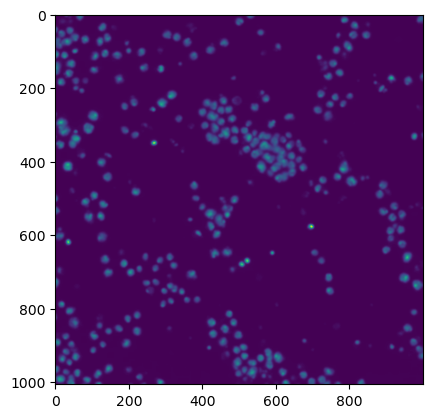

In [81]:
plt.imshow(gaus)

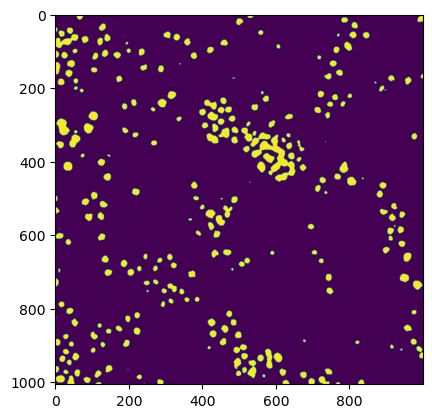

In [83]:
plt.imshow(gaus>25)
celllabels, ncells = ndi.label(gaus>25)

In [90]:
labelareas = ndi.sum(np.ones(gaus.shape), celllabels, range(1, ncells+1))